## Image Classifier

In [2]:
import zipfile
import tensorflow as tf

In [3]:
file_name='archive.zip'
training_dir='horse-or-human/train/'

In [5]:
zip_ref=zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [9]:
#Images scaled by 1/255.0

train_datagen = ImageDataGenerator(rescale=1/255.0)
validation_datagen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(300, 300),
        class_mode='binary'
        )

Found 2566 images belonging to 1 classes.


In [10]:
#CNN architecture

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [15]:
#Train the model

history=model.fit_generator(train_generator, epochs=15)

C:\Users\harsh\AppData\Local\Temp\ipykernel_17628\1234505994.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator, epochs=15)


Epoch 1/15
81/81 [==============================] - 25s 211ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 2/15
81/81 [==============================] - 17s 211ms/step - loss: 5.9323e-09 - accuracy: 1.0000
Epoch 3/15
81/81 [==============================] - 18s 220ms/step - loss: 3.2865e-10 - accuracy: 1.0000
Epoch 4/15
81/81 [==============================] - 17s 212ms/step - loss: 6.8035e-11 - accuracy: 1.0000
Epoch 5/15
81/81 [==============================] - 18s 219ms/step - loss: 3.3481e-11 - accuracy: 1.0000
Epoch 6/15
81/81 [==============================] - 18s 218ms/step - loss: 2.2080e-11 - accuracy: 1.0000
Epoch 7/15
81/81 [==============================] - 18s 219ms/step - loss: 1.6031e-11 - accuracy: 1.0000
Epoch 8/15
81/81 [==============================] - 18s 216ms/step - loss: 1.2800e-11 - accuracy: 1.0000
Epoch 9/15
81/81 [==============================] - 18s 216ms/step - loss: 1.0634e-11 - accuracy: 1.0000
Epoch 10/15
81/81 [==============================] - 30s 36

### Adding Validation to the dataset

In [20]:
validation_file_name="archive.zip"
validation_dir='horse-or-human/validation/'

In [23]:
zip_ref=zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [25]:
#Image DataGenerator to manage the images

validation_datagen = ImageDataGenerator(rescale=1/255.0)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        class_mode='binary'
        )

Found 2566 images belonging to 1 classes.


In [26]:
#Train the model

history=model.fit_generator(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15


C:\Users\harsh\AppData\Local\Temp\ipykernel_17628\3608632934.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator, epochs=15, validation_data=validation_generator)


81/81 [==============================] - 20s 243ms/step - loss: 4.7959e-12 - accuracy: 1.0000 - val_loss: 4.6057e-12 - val_accuracy: 1.0000
Epoch 2/15
81/81 [==============================] - 18s 227ms/step - loss: 4.4418e-12 - accuracy: 1.0000 - val_loss: 4.2767e-12 - val_accuracy: 1.0000
Epoch 3/15
81/81 [==============================] - 18s 228ms/step - loss: 4.1261e-12 - accuracy: 1.0000 - val_loss: 3.9685e-12 - val_accuracy: 1.0000
Epoch 4/15
81/81 [==============================] - 19s 237ms/step - loss: 3.8450e-12 - accuracy: 1.0000 - val_loss: 3.7201e-12 - val_accuracy: 1.0000
Epoch 5/15
81/81 [==============================] - 19s 229ms/step - loss: 3.6109e-12 - accuracy: 1.0000 - val_loss: 3.5004e-12 - val_accuracy: 1.0000
Epoch 6/15
81/81 [==============================] - 19s 230ms/step - loss: 3.4030e-12 - accuracy: 1.0000 - val_loss: 3.3047e-12 - val_accuracy: 1.0000
Epoch 7/15
81/81 [==============================] - 19s 230ms/step - loss: 3.2174e-12 - accuracy: 1.0000 

In [24]:
#Save the model
model.save('horse_or_human_model.h5')

### Test the model

In [27]:
import numpy as np
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

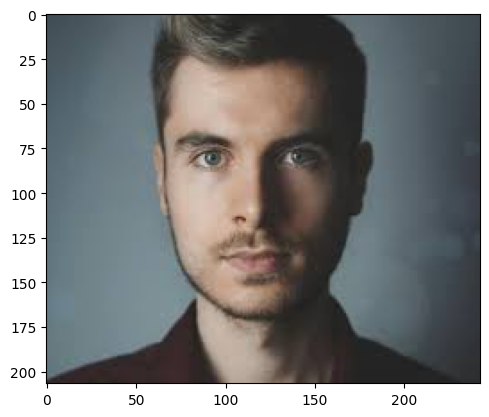

In [28]:
img=cv2.imread('download.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

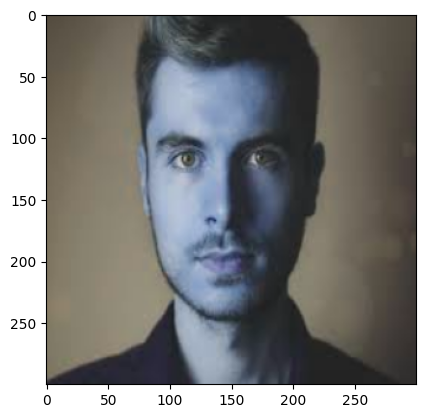

In [30]:
resize = tf.image.resize(img, (300,300))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
resize

<tf.Tensor: shape=(300, 300, 3), dtype=float32, numpy=
array([[[84.      , 76.      , 63.      ],
        [84.      , 76.      , 63.      ],
        [84.      , 76.      , 63.      ],
        ...,
        [80.      , 73.      , 64.      ],
        [80.      , 73.      , 64.      ],
        [80.      , 73.      , 64.      ]],

       [[84.      , 76.      , 63.      ],
        [84.      , 76.      , 63.      ],
        [84.280876, 76.280876, 63.280876],
        ...,
        [80.      , 73.      , 64.      ],
        [80.      , 73.      , 64.      ],
        [80.      , 73.      , 64.      ]],

       [[84.      , 76.      , 63.      ],
        [84.16087 , 76.16087 , 63.160873],
        [84.631874, 76.631874, 63.631878],
        ...,
        [80.      , 73.      , 64.      ],
        [80.      , 73.      , 64.      ],
        [80.      , 73.      , 64.      ]],

       ...,

       [[77.325226, 72.325226, 73.65021 ],
        [70.96171 , 67.23083 , 68.55581 ],
        [62.755173, 59.1233

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 527ms/step


Predicted class is Human


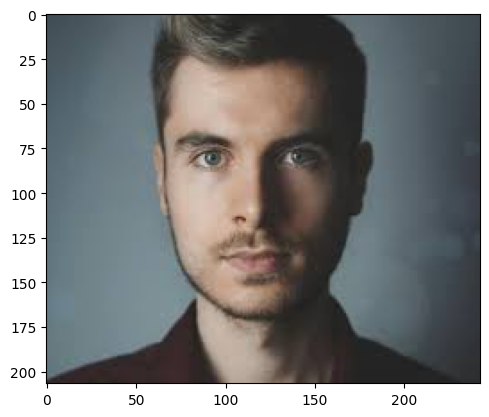

In [34]:
if yhat>0.5:
    print("Predicted class is Horse")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Predicted class is Human")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

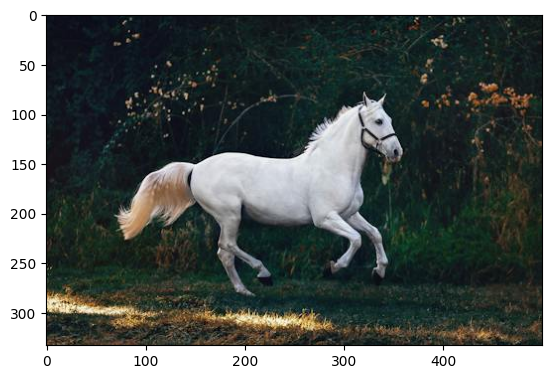

In [36]:

#Another test
img=cv2.imread('download1.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

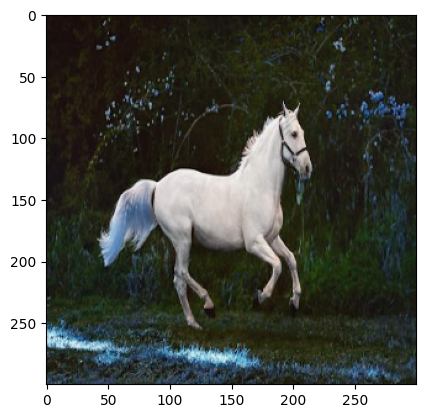

In [37]:
resize = tf.image.resize(img, (300,300))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


Predicted class is Horse


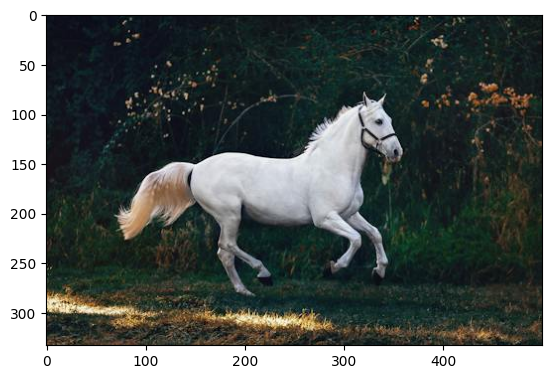

In [41]:
if yhat>0.5:
    print("Predicted class is Human")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Predicted class is Horse")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

### Successfully predicted Human or Horse class